In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [15]:
# read in economic data

econ_data = pd.read_csv('../Data_Analysis_Final_Project/static/Resources/OECD_Dataframes.csv')
econ_data.head()


,Dataset,COU,Country,Time,Description,Value,Unit
0,Avg. Work Hours (Annual),AUS,Australia,2000,Total employment,1779.63,Hours
1,Avg. Work Hours (Annual),AUS,Australia,2001,Total employment,1746.37,Hours
2,Avg. Work Hours (Annual),AUS,Australia,2002,Total employment,1741.82,Hours
3,Avg. Work Hours (Annual),AUS,Australia,2003,Total employment,1735.10,Hours
4,Avg. Work Hours (Annual),AUS,Australia,2004,Total employment,1733.74,Hours


In [21]:
# change time type to int

econ_data.astype({'Time': 'int'}).dtypes


ValueError: invalid literal for int() with base 10: '17-Sep'

In [24]:
econ_data["Time"].value_counts()


2013      16106
2014      16103
2012      16066
2009      16043
2010      16005
2011      15666
2002      15639
2003      15636
2008      15590
2001      15584
2007      15584
2004      15269
2000      15228
2006      15193
2005      14859
2015      14655
2016      10708
2014       2889
2013       2883
2009       2878
2012       2875
2010       2869
2011       2819
2002       2813
2003       2810
2007       2805
2008       2803
2001       2799
2004       2754
2000       2741
          ...  
2005       2687
2015       2621
2017       2040
2016       1914
2017        421
19-Jan      418
19-Feb      418
18-May      418
17-Nov      418
18-Feb      418
18-Mar      418
18-Sep      418
18-Dec      418
18-Jul      418
17-Sep      418
18-Oct      418
18-Apr      418
18-Jan      418
17-Dec      418
18-Jun      418
18-Aug      418
18-Nov      418
17-Oct      418
19-Mar      417
19-Apr      392
19-May      391
19-Jun      389
2018        170
19-Jul      166
19-Aug       65
Name: Time, Length: 61, 

In [27]:
# create dataframe for Finland, only retaining annual hours worked 

Finland_hours_df = econ_data[(econ_data['Dataset'] == 'Avg. Work Hours (Annual)') &
                            (econ_data['Country'] == 'Finland') &
                            (econ_data['Description'] == 'Total employment')]

#df[(df['col1'] >= 1) & (df['col1'] <=1 )]

Finland_hours_df


,Dataset,COU,Country,Time,Description,Value,Unit
225,Avg. Work Hours (Annual),FIN,Finland,2000,Total employment,1663.0,Hours
226,Avg. Work Hours (Annual),FIN,Finland,2001,Total employment,1644.0,Hours
227,Avg. Work Hours (Annual),FIN,Finland,2002,Total employment,1636.0,Hours
228,Avg. Work Hours (Annual),FIN,Finland,2003,Total employment,1628.0,Hours
229,Avg. Work Hours (Annual),FIN,Finland,2004,Total employment,1629.0,Hours
230,Avg. Work Hours (Annual),FIN,Finland,2005,Total employment,1620.0,Hours
231,Avg. Work Hours (Annual),FIN,Finland,2006,Total employment,1616.0,Hours
232,Avg. Work Hours (Annual),FIN,Finland,2007,Total employment,1614.0,Hours
233,Avg. Work Hours (Annual),FIN,Finland,2008,Total employment,1608.0,Hours
234,Avg. Work Hours (Annual),FIN,Finland,2009,Total employment,1585.0,Hours


In [28]:
Finland_hours_df.astype({'Time': 'int'}).dtypes


Dataset         object
COU             object
Country         object
Time             int64
Description     object
Value          float64
Unit            object
dtype: object

In [30]:
# retain only years 2010+

Finland_hours_df = Finland_hours_df[(Finland_hours_df['Time'] > 2009)]
Finland_hours_df


,Dataset,COU,Country,Time,Description,Value,Unit
235,Avg. Work Hours (Annual),FIN,Finland,2010,Total employment,1592.0,Hours
236,Avg. Work Hours (Annual),FIN,Finland,2011,Total employment,1587.0,Hours
237,Avg. Work Hours (Annual),FIN,Finland,2012,Total employment,1575.0,Hours
238,Avg. Work Hours (Annual),FIN,Finland,2013,Total employment,1565.0,Hours
239,Avg. Work Hours (Annual),FIN,Finland,2014,Total employment,1562.0,Hours
240,Avg. Work Hours (Annual),FIN,Finland,2015,Total employment,1563.0,Hours
241,Avg. Work Hours (Annual),FIN,Finland,2016,Total employment,1560.0,Hours
242,Avg. Work Hours (Annual),FIN,Finland,2017,Total employment,1556.0,Hours
243,Avg. Work Hours (Annual),FIN,Finland,2018,Total employment,1555.0,Hours


In [5]:
# read in happiness data

happy_data = pd.read_csv('world_happiness.csv')
happy_data.head()


,Unnamed: 0,Country name,Year,Life Ladder
0,0,Afghanistan,2008,3.723590
1,1,Afghanistan,2009,4.401778
2,2,Afghanistan,2010,4.758381
3,3,Afghanistan,2011,3.831719
4,4,Afghanistan,2012,3.782938


In [32]:
# create dataframe for Finland only and for 2010+

Finland_happy_df = happy_data[(happy_data['Country name'] == 'Finland') &
                             (happy_data['Year'] > 2009)]
Finland_happy_df


,Unnamed: 0,Country name,Year,Life Ladder
487,487,Finland,2010,7.393264
488,488,Finland,2011,7.354225
489,489,Finland,2012,7.420209
490,490,Finland,2013,7.444636
491,491,Finland,2014,7.384571
492,492,Finland,2015,7.447926
493,493,Finland,2016,7.659843
494,494,Finland,2017,7.788252
495,495,Finland,2018,7.858107


In [34]:
# rename columns with snakecase

Finland_happy = Finland_happy_df.rename(columns={"Country Name": "country_name", 
                                 "Year": "year", 
                                 "Life Ladder": "life_ladder"})
Finland_happy


,Unnamed: 0,Country name,year,life_ladder
487,487,Finland,2010,7.393264
488,488,Finland,2011,7.354225
489,489,Finland,2012,7.420209
490,490,Finland,2013,7.444636
491,491,Finland,2014,7.384571
492,492,Finland,2015,7.447926
493,493,Finland,2016,7.659843
494,494,Finland,2017,7.788252
495,495,Finland,2018,7.858107


In [35]:
# Assign the data to X and y

X = Finland_hours_df.Value.values.reshape(-1, 1)
y = Finland_happy.life_ladder.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X


Shape:  (9, 1) (9, 1)


array([[1592.],
       [1587.],
       [1575.],
       [1565.],
       [1562.],
       [1563.],
       [1560.],
       [1556.],
       [1555.]])

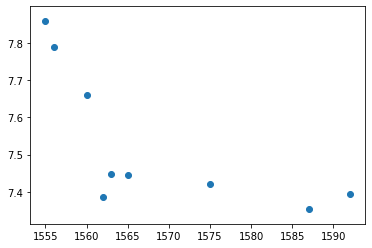

In [36]:
# plot

plt.scatter(X, y)


In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [38]:
# Fit the model to the data. 

model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-0.00994952]]
y-axis intercept:  [23.13205925]


In [40]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")


Min X Value: [[1555.]]
Max X Value: [[1592.]]


In [41]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)


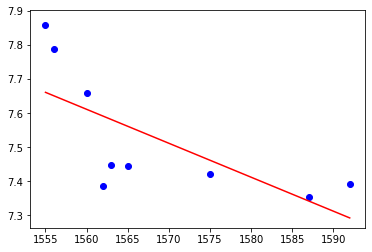

In [42]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
